**Task 3-** Decision Tree Classifier


Internship Domain:Data Science


**Dataset:** Bank Marketing Dataset(Kaggle)

**Objective:** Build a Decision Tree Classifier to predict whether a customer will subscribe to a term deposit(deposit = yes/no).

This task includes datasetloading, preprocessing, feature engineering, model training, evaluation and visualization.

In [ ]:
from google .colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
import pandas as pd
df = pd.read_csv('bank.csv',sep=',')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
print("Shape:",df.shape)
print("\nColumn:",df.columns)

print("\nDataset Info:",df.info())
print("\nMissing Values:",df.isnull().sum())

Shape: (4521, 17)

Column: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null 

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
x = df.drop("y",axis=1)
y = df["y"].map({"yes": 1, "no": 0})

In [ ]:
num_cols = x.select_dtypes(include=['int64','float64']).columns
cat_cols = x.select_dtypes(include=['object']).columns
num_cols,cat_cols

(Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome'],
       dtype='object'))

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer([
    ('num',StandardScaler(),num_cols),
    ('cat',OneHotEncoder(handle_unknown="ignore"),cat_cols)
])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y
    )

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = Pipeline([
    ("preprocess",preprocess),
    ("model",DecisionTreeClassifier(max_depth=5,random_state=42))
])
clf.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

Accuracy: 0.8895027624309392

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       801
           1       0.53      0.33      0.40       104

    accuracy                           0.89       905
   macro avg       0.72      0.64      0.67       905
weighted avg       0.87      0.89      0.88       905



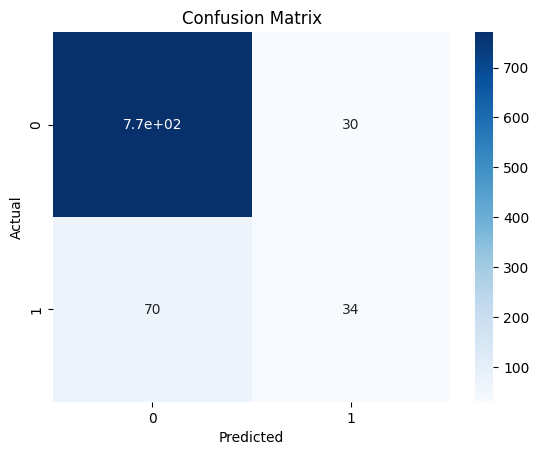

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

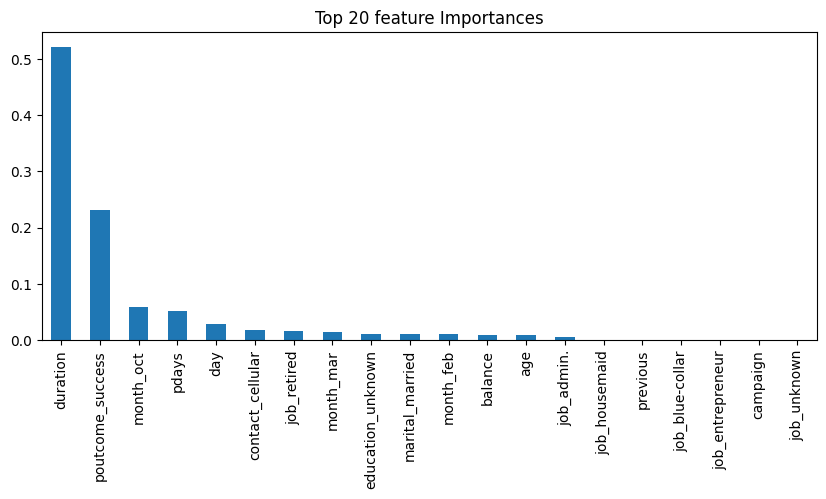

In [ ]:
#Extract OHE feature names
ohe = clf.named_steps["preprocess"].named_transformers_["cat"]
ohe_cols = list(ohe.get_feature_names_out(cat_cols))

all_features = list(num_cols) + ohe_cols

importances = clf.named_steps["model"].feature_importances_

feat_imp = pd.Series(importances,index=all_features)
feat_imp.sort_values(ascending=False).head(20).plot(kind="bar", figsize=(10,4))
plt.title("Top 20 feature Importances")
plt.show()

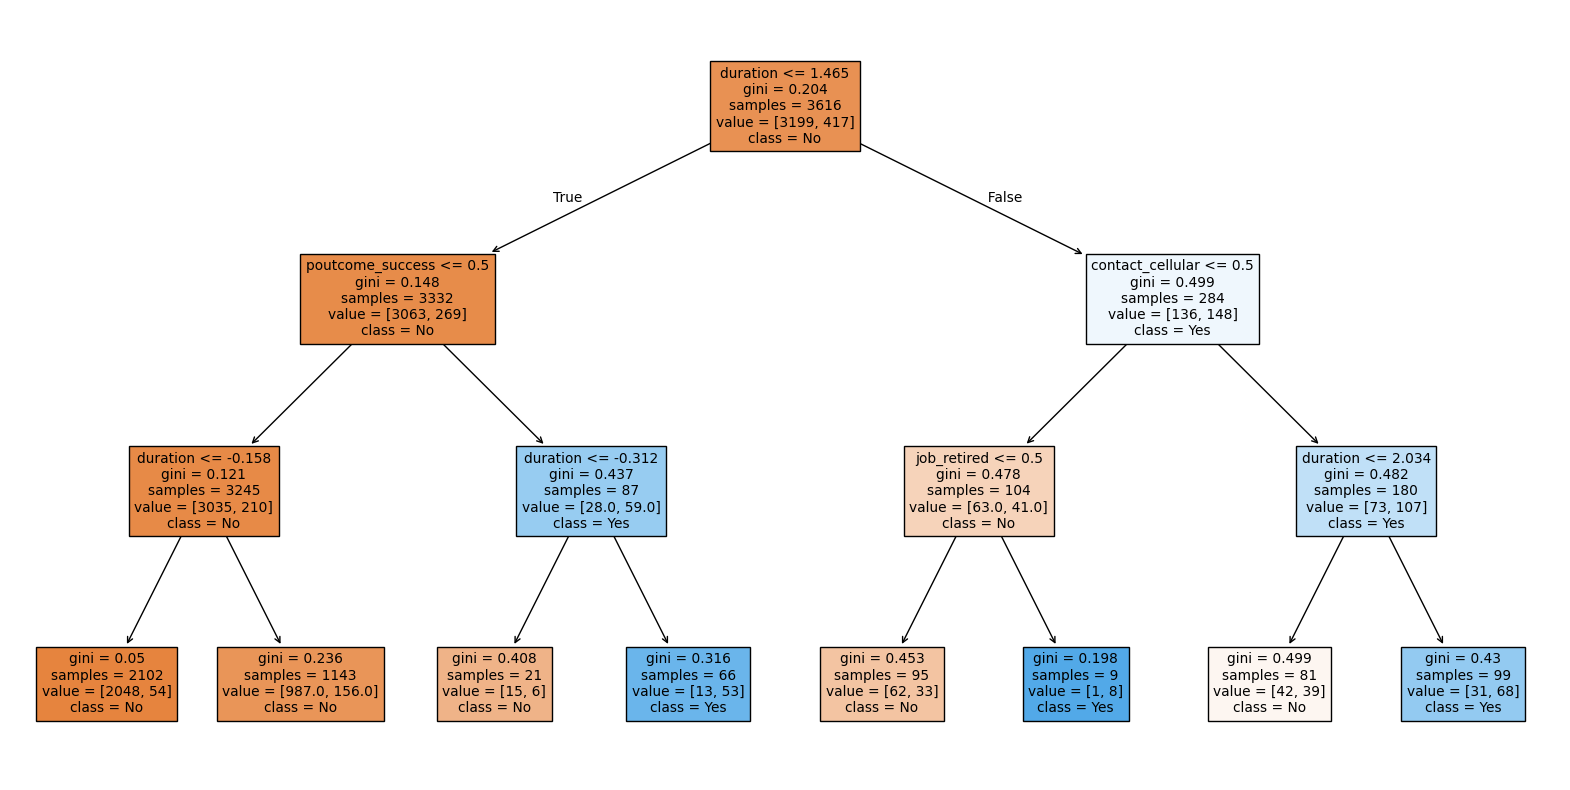

In [ ]:
from sklearn import tree

clf_small = Pipeline([
    ("preprocess",preprocess),
    ("model",DecisionTreeClassifier(max_depth=3,random_state=42))
])
clf_small.fit(x_train,y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(clf_small.named_steps["model"],
               feature_names=all_features,
               class_names=["No","Yes"],
               filled=True)
plt.show()

**Final Observation**

1.The data was cleaned by removing extra symbols like double quotes and splitting values where commas were present.

2.Column names were corrected to avoid errors while working in Python.

3.The target column deposit was converted from yes and no into numeric values 1 and 0.

4.The dataset was divided into input features (X) and target variable (y).

5.A Decision Tree model was trained using the prepared data.

6.Feature importance was calculated from the model.

7.A feature importance plot was created to show which features are most important.